In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


In [89]:
data=pd.read_csv('stock.csv')
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


In [91]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       639 non-null    datetime64[ns]
 1   High       639 non-null    float64       
 2   Low        639 non-null    float64       
 3   Open       639 non-null    float64       
 4   Close      639 non-null    float64       
 5   Volume     639 non-null    float64       
 6   Adj Close  639 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 35.1 KB


In [92]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999
...,...,...,...,...,...,...,...
634,2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010
635,2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010
636,2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010
637,2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990


In [93]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data=data.drop(columns='Date')
data

,High,Low,Open,Close,Volume,Adj Close,day,month,year
0,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,30,9,2019
1,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,1,10,2019
2,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,2,10,2019
3,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,3,10,2019
4,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,4,10,2019
...,...,...,...,...,...,...,...,...,...
634,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010,5,4,2022
635,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010,6,4,2022
636,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010,7,4,2022
637,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990,8,4,2022


In [95]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close,day,month,year
High,1.000000,0.998930,0.999275,0.999116,-0.534646,0.999116,-0.015054,-0.056395,0.865397
Low,0.998930,1.000000,0.998996,0.999112,-0.552558,0.999112,-0.014181,-0.050943,0.864156
Open,0.999275,0.998996,1.000000,0.998002,-0.543403,0.998002,-0.018933,-0.054620,0.864741
Close,0.999116,0.999112,0.998002,1.000000,-0.541623,1.000000,-0.012314,-0.051659,0.863624
Volume,-0.534646,-0.552558,-0.543403,-0.541623,1.000000,-0.541623,-0.003326,-0.180604,-0.431266
Adj Close,0.999116,0.999112,0.998002,1.000000,-0.541623,1.000000,-0.012314,-0.051659,0.863624
day,-0.015054,-0.014181,-0.018933,-0.012314,-0.003326,-0.012314,1.000000,0.006893,-0.036095
month,-0.056395,-0.050943,-0.054620,-0.051659,-0.180604,-0.051659,0.006893,1.000000,-0.452981
year,0.865397,0.864156,0.864741,0.863624,-0.431266,0.863624,-0.036095,-0.452981,1.000000


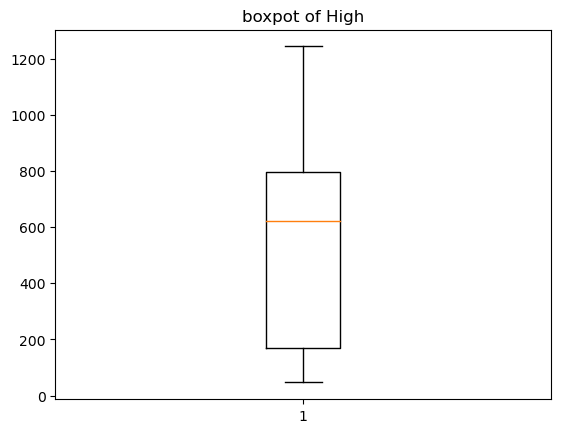

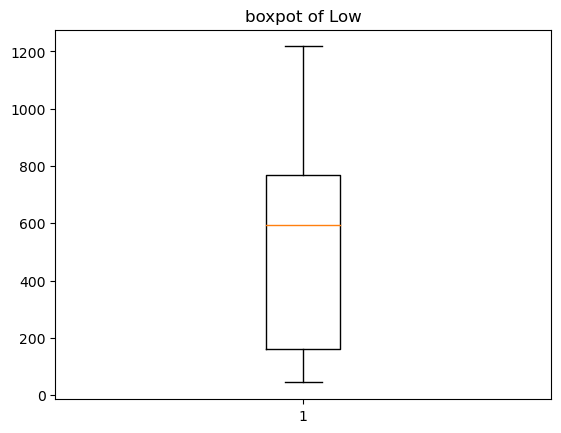

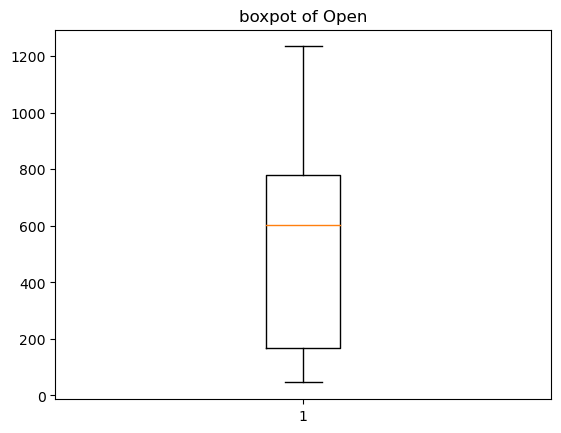

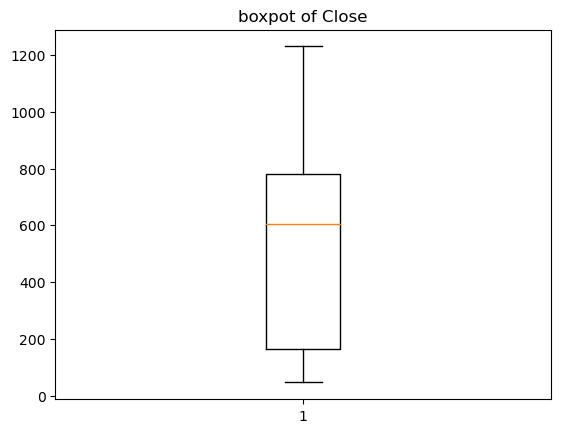

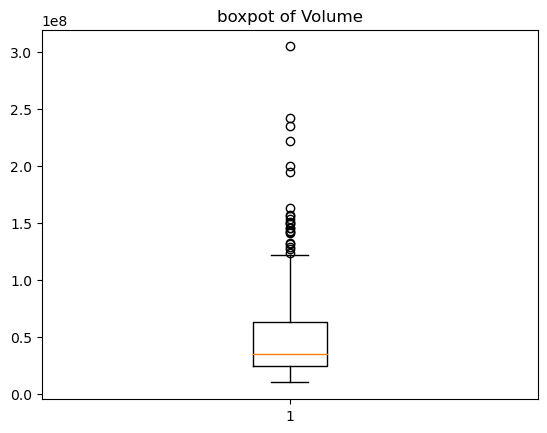

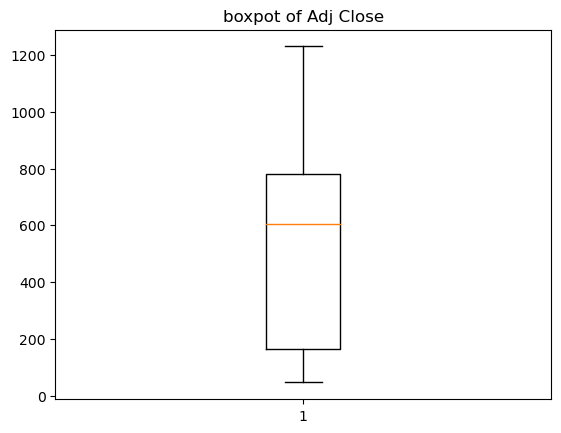

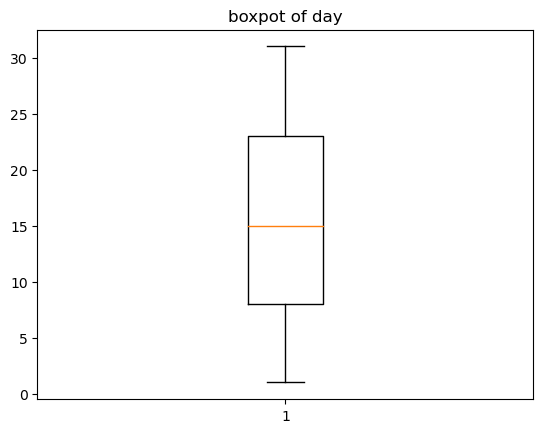

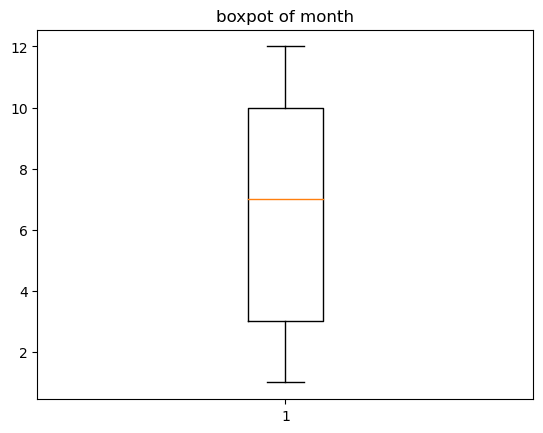

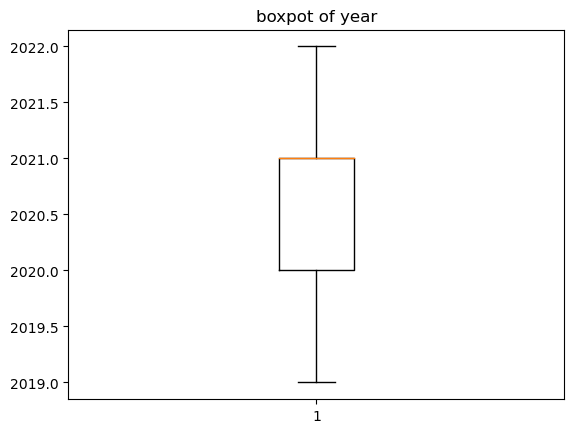

In [96]:
for i in data.columns:
    plt.boxplot(data[i])
    plt.title('boxpot of '+i)
    plt.show()

In [97]:
perc=np.percentile(data['Volume'],(25,75))
print(perc)
iqr=perc[1]-perc[0]
print(iqr)
perc[1]=perc[1]+1.5*iqr
perc[0]=perc[0]-1.5*iqr

[23921950. 63297250.]
39375300.0


In [98]:
data=data[data['Volume']<=perc[1]]
data

,High,Low,Open,Close,Volume,Adj Close,day,month,year
0,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,30,9,2019
1,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,1,10,2019
2,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,2,10,2019
3,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,3,10,2019
4,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,4,10,2019
...,...,...,...,...,...,...,...,...,...
634,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010,5,4,2022
635,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010,6,4,2022
636,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010,7,4,2022
637,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990,8,4,2022


In [99]:
data.to_csv('new_stock.csv',index=False)

In [100]:
x=data.drop(columns=['Adj Close'])
y=data['Adj Close']

In [101]:
x.corr()

,High,Low,Open,Close,Volume,day,month,year
High,1.000000,0.998914,0.999248,0.999098,-0.568604,-0.022839,-0.101316,0.866581
Low,0.998914,1.000000,0.998960,0.999088,-0.587954,-0.022428,-0.096109,0.865372
Open,0.999248,0.998960,1.000000,0.997919,-0.578038,-0.027153,-0.099846,0.865985
Close,0.999098,0.999088,0.997919,1.000000,-0.575629,-0.020327,-0.096902,0.864964
Volume,-0.568604,-0.587954,-0.578038,-0.575629,1.000000,0.050734,-0.116718,-0.475338
day,-0.022839,-0.022428,-0.027153,-0.020327,0.050734,1.000000,-0.007718,-0.037459
month,-0.101316,-0.096109,-0.099846,-0.096902,-0.116718,-0.007718,1.000000,-0.487090
year,0.866581,0.865372,0.865985,0.864964,-0.475338,-0.037459,-0.487090,1.000000


In [102]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5,random_state=1)
ytrain

29      67.428001
104    133.598007
331    846.640015
80     112.963997
496    759.489990
          ...    
150    153.641998
165    164.046005
79     114.440002
257    413.980011
39      66.608002
Name: Adj Close, Length: 308, dtype: float64

In [103]:
xtrain.head()

,High,Low,Open,Close,Volume,day,month,year
29,67.491997,66.500000,66.900002,67.428001,30346000.0,8,11,2019
104,138.104004,122.304001,125.940002,133.598007,121114500.0,28,2,2020
331,848.000000,828.619995,834.309998,846.640015,20066500.0,22,1,2021
80,114.772003,110.851997,114.125999,112.963997,71768000.0,24,1,2020
496,761.039978,750.000000,757.150024,759.489990,28204200.0,17,9,2021


In [104]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(xtrain, ytrain)
pred=reg.predict(xtest)


In [105]:
r2 = r2_score(ytest, pred)
r2

1.0

In [106]:
mse(ytest,pred)

4.6806293440277155e-26

In [107]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(max_depth=2,random_state=0)
regressor.fit(xtrain,ytrain)
pred=regressor.predict(xtest)

In [108]:
np.sqrt(mse(ytest,pred))
#take sqrt to get rmse which is apprx 70 here 

64.33859778850801

In [109]:
r2 = r2_score(ytest, pred)
r2

0.9628336996526643

In [110]:
# import XGBClassifier
import xgboost as xg 
xgb = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123) 
# Fitting the model 
xgb.fit(xtrain, ytrain) 

D:\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:12:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [111]:
pred = xgb.predict(xtest) 
  
# RMSE Computation 
rmse = np.sqrt(mse(ytest, pred))
rmse

17.124063072095517

In [112]:
r2 = r2_score(ytest, pred)
r2

0.9973671883764766

In [127]:
#now lets see what we can do with features
data=pd.read_csv('new_stock.csv')
data.head()

,High,Low,Open,Close,Volume,Adj Close,day,month,year
0,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,30,9,2019
1,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,1,10,2019
2,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,2,10,2019
3,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,3,10,2019
4,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,4,10,2019


In [128]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close,day,month,year
High,1.000000,0.998914,0.999248,0.999098,-0.568604,0.999098,-0.022839,-0.101316,0.866581
Low,0.998914,1.000000,0.998960,0.999088,-0.587954,0.999088,-0.022428,-0.096109,0.865372
Open,0.999248,0.998960,1.000000,0.997919,-0.578038,0.997919,-0.027153,-0.099846,0.865985
Close,0.999098,0.999088,0.997919,1.000000,-0.575629,1.000000,-0.020327,-0.096902,0.864964
Volume,-0.568604,-0.587954,-0.578038,-0.575629,1.000000,-0.575629,0.050734,-0.116718,-0.475338
Adj Close,0.999098,0.999088,0.997919,1.000000,-0.575629,1.000000,-0.020327,-0.096902,0.864964
day,-0.022839,-0.022428,-0.027153,-0.020327,0.050734,-0.020327,1.000000,-0.007718,-0.037459
month,-0.101316,-0.096109,-0.099846,-0.096902,-0.116718,-0.096902,-0.007718,1.000000,-0.487090
year,0.866581,0.865372,0.865985,0.864964,-0.475338,0.864964,-0.037459,-0.487090,1.000000


In [129]:
#as day and month are very less related to data we can drop them 
data=data.drop(columns=['day','month'])
data

,High,Low,Open,Close,Volume,Adj Close,year
0,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,2019
1,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,2019
2,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,2019
3,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,2019
4,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,2019
...,...,...,...,...,...,...,...
611,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010,2022
612,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010,2022
613,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010,2022
614,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990,2022


In [130]:
#now repeat the same steps 
x=data.drop(columns=['Adj Close'])
y=data['Adj Close']

In [131]:
#as we see the columsn are very highly correlated we can say they might be linearly dependent.
x.corr()

,High,Low,Open,Close,Volume,year
High,1.000000,0.998914,0.999248,0.999098,-0.568604,0.866581
Low,0.998914,1.000000,0.998960,0.999088,-0.587954,0.865372
Open,0.999248,0.998960,1.000000,0.997919,-0.578038,0.865985
Close,0.999098,0.999088,0.997919,1.000000,-0.575629,0.864964
Volume,-0.568604,-0.587954,-0.578038,-0.575629,1.000000,-0.475338
year,0.866581,0.865372,0.865985,0.864964,-0.475338,1.000000


In [132]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
ytrain

377    684.900024
159    198.358002
539    938.530029
400    599.049988
396    625.219971
          ...    
129    153.641998
144    164.046005
72     114.440002
235    413.980011
37      66.608002
Name: Adj Close, Length: 492, dtype: float64

In [133]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(xtrain, ytrain)
pred=reg.predict(xtest)
r2 = r2_score(ytest, pred)
r2

1.0

In [134]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(max_depth=2,random_state=0)
regressor.fit(xtrain,ytrain)
pred=regressor.predict(xtest)

In [135]:
r2 = r2_score(ytest, pred)
r2

0.956946134579513

In [136]:
import xgboost as xg 
xgb = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123) 
# Fitting the model 
xgb.fit(xtrain, ytrain) 

D:\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:15:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [137]:
r2 = r2_score(ytest, pred)
r2

0.956946134579513